In [1]:
import pandas as pd
import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
filtered_train = train[train['Cabin'].notnull()]

In [6]:
filtered_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [7]:
filtered_train['Pclass'].unique()

array([1, 3, 2], dtype=int64)

In [8]:
from sklearn.impute import KNNImputer

In [9]:
df = pd.concat([train,test],axis=0)

In [10]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [11]:
df_drop = df.drop(columns=['Cabin'],axis=1)

In [12]:
# fill missing val except survived
df_drop['Age'] = df_drop['Age'].fillna(df_drop['Age'].mean())
df_drop['Fare'] = df_drop['Fare'].fillna(df_drop['Fare'].mean())

In [13]:
df_drop['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [14]:
df_drop['Embarked'] = df_drop['Embarked'].fillna(df_drop['Embarked'].mode()[0])

In [15]:
df_drop.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Fare', ylabel='Density'>

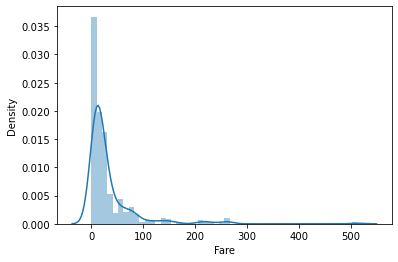

In [17]:
sns.distplot(df_drop['Fare'])

In [18]:
df_drop['Fare'] = np.log(df_drop['Fare']+1)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

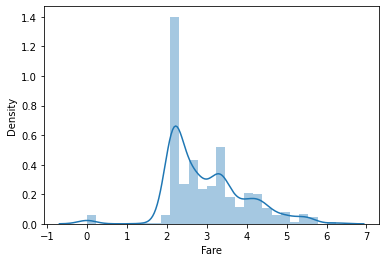

In [19]:
sns.distplot(df_drop['Fare'])

<AxesSubplot:>

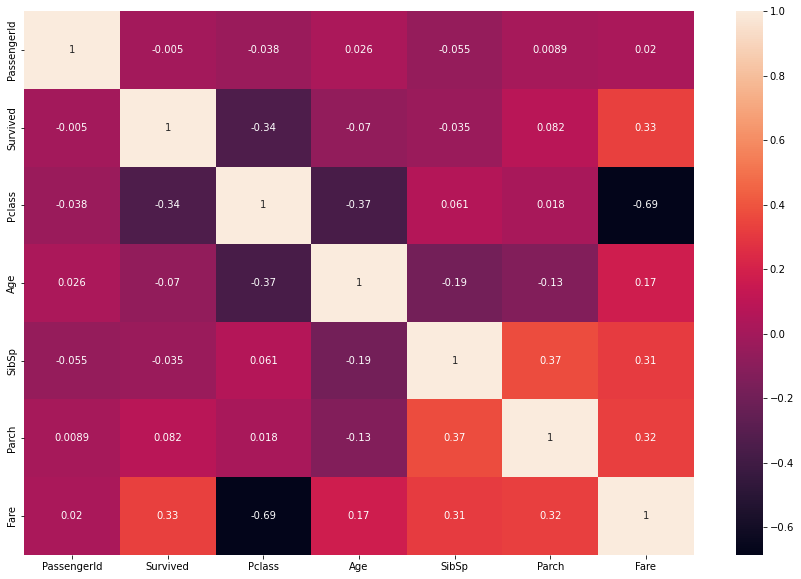

In [20]:
corr = df_drop.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True)

In [21]:
df_clean = df_drop.drop(columns=['Name','Ticket'],axis=1)


In [22]:
df_clean.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,male,22.0,1,0,2.110213,S
1,2,1.0,1,female,38.0,1,0,4.280593,C
2,3,1.0,3,female,26.0,0,0,2.188856,S
3,4,1.0,1,female,35.0,1,0,3.990834,S
4,5,0.0,3,male,35.0,0,0,2.202765,S


In [23]:
gender = pd.get_dummies(df_clean.Sex)
df_clean = pd.concat([df_clean, gender], axis=1)

In [24]:
embark = pd.get_dummies(df_clean.Embarked)
df_clean = pd.concat([df_clean, embark], axis=1)

In [25]:
df_clean = df_clean.reset_index()

In [26]:
df_clean

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,0,1,0.0,3,male,22.000000,1,0,2.110213,S,0,1,0,0,1
1,1,2,1.0,1,female,38.000000,1,0,4.280593,C,1,0,1,0,0
2,2,3,1.0,3,female,26.000000,0,0,2.188856,S,1,0,0,0,1
3,3,4,1.0,1,female,35.000000,1,0,3.990834,S,1,0,0,0,1
4,4,5,0.0,3,male,35.000000,0,0,2.202765,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,male,29.881138,0,0,2.202765,S,0,1,0,0,1
1305,414,1306,NaN,1,female,39.000000,0,0,4.699571,C,1,0,1,0,0
1306,415,1307,NaN,3,male,38.500000,0,0,2.110213,S,0,1,0,0,1
1307,416,1308,NaN,3,male,29.881138,0,0,2.202765,S,0,1,0,0,1


In [27]:
train_clean = df_clean.iloc[:len(train), :]
test_clean = df_clean.iloc[len(train):, :]

In [28]:
train_clean

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
0,0,1,0.0,3,male,22.000000,1,0,2.110213,S,0,1,0,0,1
1,1,2,1.0,1,female,38.000000,1,0,4.280593,C,1,0,1,0,0
2,2,3,1.0,3,female,26.000000,0,0,2.188856,S,1,0,0,0,1
3,3,4,1.0,1,female,35.000000,1,0,3.990834,S,1,0,0,0,1
4,4,5,0.0,3,male,35.000000,0,0,2.202765,S,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0.0,2,male,27.000000,0,0,2.639057,S,0,1,0,0,1
887,887,888,1.0,1,female,19.000000,0,0,3.433987,S,1,0,0,0,1
888,888,889,0.0,3,female,29.881138,1,2,3.196630,S,1,0,0,0,1
889,889,890,1.0,1,male,26.000000,0,0,3.433987,C,0,1,1,0,0


In [29]:
test_clean

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,female,male,C,Q,S
891,0,892,NaN,3,male,34.500000,0,0,2.178064,Q,0,1,0,1,0
892,1,893,NaN,3,female,47.000000,1,0,2.079442,S,1,0,0,0,1
893,2,894,NaN,2,male,62.000000,0,0,2.369075,Q,0,1,0,1,0
894,3,895,NaN,3,male,27.000000,0,0,2.268252,S,0,1,0,0,1
895,4,896,NaN,3,female,22.000000,1,1,2.586824,S,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,413,1305,NaN,3,male,29.881138,0,0,2.202765,S,0,1,0,0,1
1305,414,1306,NaN,1,female,39.000000,0,0,4.699571,C,1,0,1,0,0
1306,415,1307,NaN,3,male,38.500000,0,0,2.110213,S,0,1,0,0,1
1307,416,1308,NaN,3,male,29.881138,0,0,2.202765,S,0,1,0,0,1


In [31]:
train_clean = train_clean.drop(columns=['index','PassengerId','Sex','Embarked'],axis=1)
test_clean = test_clean.drop(columns=['index','PassengerId','Sex','Embarked'],axis=1)

In [33]:
train_clean.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,C,Q,S
0,0.0,3,22.0,1,0,2.110213,0,1,0,0,1
1,1.0,1,38.0,1,0,4.280593,1,0,1,0,0
2,1.0,3,26.0,0,0,2.188856,1,0,0,0,1
3,1.0,1,35.0,1,0,3.990834,1,0,0,0,1
4,0.0,3,35.0,0,0,2.202765,0,1,0,0,1


In [34]:
train_clean.to_csv('train_clean.csv',index=False)
test_clean.to_csv('test_clean.csv',index=False)

In [ ]:
#train["Ticket-1"] = df['Ticket'].str.split(' ', 1).str[0]
#train["Ticket-2"] = df['Ticket'].str.split(' ', 1).str[1]

In [ ]:
#train["Ticket-1"].unique()

In [ ]:
#train["Ticket-2"].unique()